<a href="https://colab.research.google.com/github/Inryu/capstone-design-exception/blob/main/deep-learning/7_5_CNN_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## __7.5 CNN 구현하기__

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/deep-learning-from-scratch-master/

/content/drive/MyDrive/deep-learning-from-scratch-master


In [ ]:
class SimpleConvNet:
  def __init__(self, input_dim=(1, 28, 28), conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1}, hidden_size=100, output_size=10, weight_init_std=0.01):
    filter_num = conv_param['filter_num']
    filter_size = conv_param['filter_size']
    filter_pad = conv_param['pad']
    filter_stride = conv_param['stride']
    input_size = input_dim[1]
    conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1

Streaming output truncated to the last 5000 lines.
train loss:0.0014014248414835244
train loss:0.0008519819572167156
train loss:0.0043904246058313525
train loss:0.0024637982808964013
train loss:0.010429664560233188
train loss:0.004827254222552574
train loss:0.0008844281099457059
train loss:0.009303653047628254
train loss:0.0008365520533902981
train loss:0.006963335181779897
train loss:0.0013693707157537783
train loss:0.00029102526963083896
train loss:0.0014143387543640148
train loss:0.005222607999324375
train loss:0.008778853807452741
train loss:0.0022465842318910617
train loss:0.008965133292027616
train loss:0.0019783655030999134
train loss:0.0010159960939409626
train loss:0.000850793584669429
train loss:0.007038438290563619
train loss:0.00028066245025992867
train loss:0.04748657897724196
train loss:0.0006344760505289823
train loss:0.0018568772624249093
train loss:0.0015715429743501542
train loss:0.000992288644875679
train loss:0.0010760537774694397
train loss:0.001953310294703138
tra

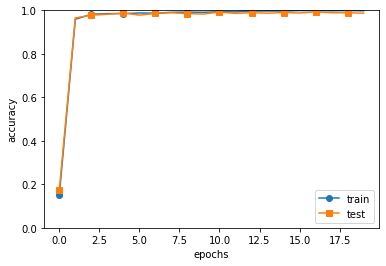

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch07.simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()